## $Gradio$ $MNIST$ $Classification$

In [ ]:
!pip install -q gradio tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 69.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.9/92.9 kB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.7/302.7 kB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 3.9 MB/s 

In [ ]:
!pip install -q gradio

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import gradio as gr

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(len(x_train), len(x_test))

60000 10000


In [ ]:
# Finding the shape of individual sample
x_train[0].shape

(28, 28)

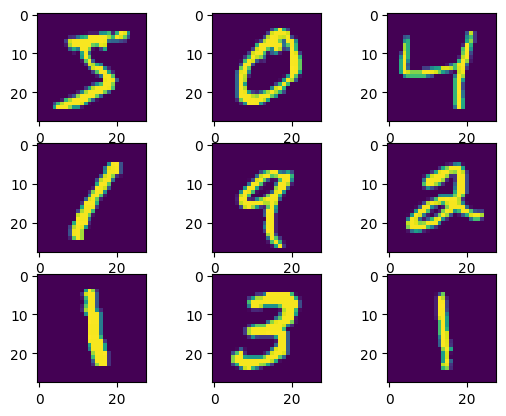

In [ ]:
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(x_train[i])

In [ ]:
y_train[0]

5

In [ ]:
# Scale the data so that the values are from 0 - 1
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
# Flattening the train and test data
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)

In [ ]:
#from tensorflow.keras.layers import Dense
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(256, activation='relu'),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(10, activation='softmax')])

In [ ]:
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=10, verbose = 2, validation_split = 0.1)

Epoch 1/10
1688/1688 - 19s - loss: 0.2169 - accuracy: 0.9348 - val_loss: 0.0983 - val_accuracy: 0.9690 - 19s/epoch - 11ms/step
Epoch 2/10
1688/1688 - 20s - loss: 0.0902 - accuracy: 0.9719 - val_loss: 0.0830 - val_accuracy: 0.9725 - 20s/epoch - 12ms/step
Epoch 3/10
1688/1688 - 17s - loss: 0.0629 - accuracy: 0.9800 - val_loss: 0.0777 - val_accuracy: 0.9778 - 17s/epoch - 10ms/step
Epoch 4/10
1688/1688 - 11s - loss: 0.0449 - accuracy: 0.9854 - val_loss: 0.0730 - val_accuracy: 0.9807 - 11s/epoch - 7ms/step
Epoch 5/10
1688/1688 - 9s - loss: 0.0360 - accuracy: 0.9885 - val_loss: 0.1047 - val_accuracy: 0.9703 - 9s/epoch - 5ms/step
Epoch 6/10
1688/1688 - 11s - loss: 0.0275 - accuracy: 0.9910 - val_loss: 0.0801 - val_accuracy: 0.9788 - 11s/epoch - 7ms/step
Epoch 7/10
1688/1688 - 11s - loss: 0.0263 - accuracy: 0.9914 - val_loss: 0.0904 - val_accuracy: 0.9773 - 11s/epoch - 7ms/step
Epoch 8/10
1688/1688 - 11s - loss: 0.0201 - accuracy: 0.9937 - val_loss: 0.1008 - val_accuracy: 0.9758 - 11s/epoch - 

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0999 - accuracy: 0.9781


[0.09986400604248047, 0.9781000018119812]

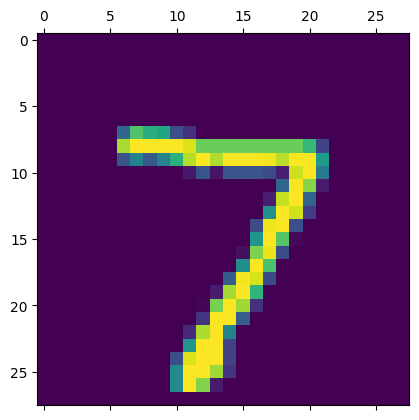

In [ ]:
# Show the image
plt.matshow(x_test[0])

In [ ]:
# Make the predictions
y_predicted = model.predict(x_test)
y_predicted[0]

313/313 [==============================] - 1s 3ms/step


array([1.1996463e-13, 3.7912111e-11, 4.7842585e-10, 9.0012717e-09,
       2.0555701e-17, 3.3964027e-12, 2.6356501e-18, 9.9999994e-01,
       1.2094215e-10, 9.4901434e-11], dtype=float32)

In [ ]:
# Find the maximum value using numpy
np.argmax(y_predicted[0])

7

In [ ]:
# converting y_predicted from whole numbers to integers
# so that we can use it in confusion matrix
# In short we are argmaxing the entire prediction
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    1,    2,    0,    4,    2,    5,    0,    0,    2],
       [   1, 1121,    5,    2,    0,    0,    2,    1,    3,    0],
       [   0,    3, 1010,    5,    5,    0,    0,    5,    4,    0],
       [   1,    0,    1,  996,    1,    1,    0,    4,    4,    2],
       [   0,    0,    2,    1,  970,    0,    2,    2,    0,    5],
       [   2,    1,    0,   18,    2,  857,    4,    0,    3,    5],
       [   1,    3,    0,    1,   17,    2,  929,    0,    5,    0],
       [   1,    2,    4,    0,    1,    0,    0, 1015,    1,    4],
       [   0,    0,    2,    6,    8,    1,    2,    3,  948,    4],
       [   1,    2,    0,    4,   23,    3,    0,    3,    2,  971]],
      dtype=int32)>

In [ ]:
model.save('tf_digit_classifier.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from keras.models import load_model

In [ ]:
# load model
tf_model = load_model('/content/tf_digit_classifier.h5')

In [ ]:
# Function to preprocess input image
def preprocess_image(img):
    img = tf.image.rgb_to_grayscale(img)  # Convert to grayscale
    img = tf.image.resize(img, (28, 28))   # Resize to model input size
    img = img / 255.0                      # Normalize pixel values
    img = np.expand_dims(img, axis=0)      # Add batch dimension
    return img

In [ ]:
# Function to make predictions
def predict_image(img):
    processed_img = preprocess_image(img)
    prediction = model.predict(processed_img)
    return {str(i): float(prediction[0][i]) for i in range(10)}

In [ ]:
gr.Interface(fn=predict_image, inputs=gr.Image(), outputs=gr.Label(num_top_classes=3), examples=["/content/input_4.png", "/content/input_1.png","/content/Image 2023-12-03 at 17.04.46_6cce6261.jpg","/content/Image 2023-12-03 at 17.04.46_c86ece18.jpg"],title = 'Handwritten Digits Classification').launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://012038d4d424ab6e95.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
